<a href="https://colab.research.google.com/github/Aryanupadhyay23/Deep-Learning-/blob/main/Transfer_learning_feature_extraction(data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
path = kagglehub.dataset_download("tongpython/cat-and-dog")

Using Colab cache for faster access to the 'cat-and-dog' dataset.


In [2]:
import shutil
from google.colab import files

# 1. Print the path to confirm where it is
print(f"Dataset is located at: {path}")

# 2. Zip the folder (Colab cannot download folders, only files)
print("Zipping the dataset... this may take a moment.")
shutil.make_archive("/content/cat_dog_dataset", 'zip', path)

Dataset is located at: /kaggle/input/cat-and-dog
Zipping the dataset... this may take a moment.


'/content/cat_dog_dataset.zip'

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat_dog_dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [20]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train/training_set',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test/test_set',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 63s 251ms/step - accuracy: 0.9703 - loss: 0.0696 - val_accuracy: 0.9204 - val_loss: 0.2970
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 247ms/step - accuracy: 0.9647 - loss: 0.0821 - val_accuracy: 0.9174 - val_loss: 0.2917
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 63s 250ms/step - accuracy: 0.9742 - loss: 0.0677 - val_accuracy: 0.9135 - val_loss: 0.2958
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 246ms/step - accuracy: 0.9782 - loss: 0.0574 - val_accuracy: 0.9110 - val_loss: 0.3375
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 61s 245ms/step - accuracy: 0.9693 - loss: 0.0729 - val_accuracy: 0.9086 - val_loss: 0.3281
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 247ms/step - accuracy: 0.9832 - loss: 0.0465 - val_accuracy: 0.9100 - val_loss: 0.3497
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 246ms/step - accuracy: 0.9767 - loss: 0.0597 - val_accuracy: 0.9095 - val_loss: 0.3266
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 249ms/step - accuracy: 0.9804 - loss: 0

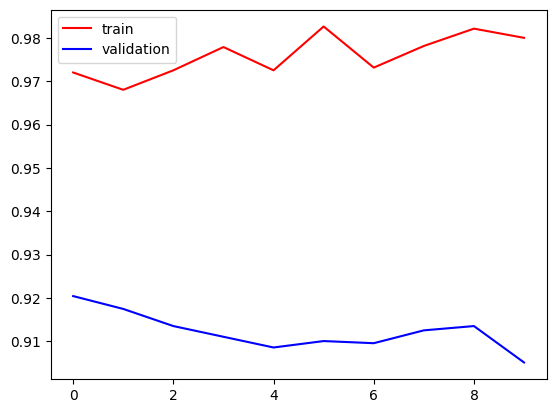

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

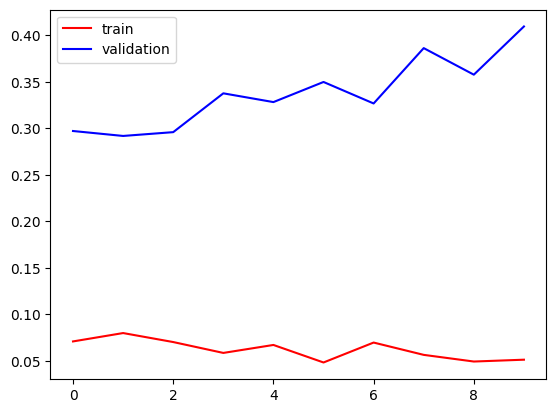

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()